In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout

In [2]:
from tensorflow.keras.utils import to_categorical

- list1:  all the images in a single list in form of an array that will describe the pixels of the image
- list2: labels of the corresponding image

## To feed image data to the model we need to convert the pixels into an array

In [11]:
imgs_path = "img_class/Train"
data = []
labels = []
classes = 43
for i in range(classes):
    img_path = os.path.join(imgs_path, str(i)) #0-42
    #print(img_path) 
    for img in os.listdir(img_path):
        #print(img)
        im = Image.open(img_path + '/' + img)
        im = im.resize((30,30))
        im = np.array(im)
        data.append(im)
        labels.append(i)
data = np.array(data)
labels = np.array(labels)
print("success")

success


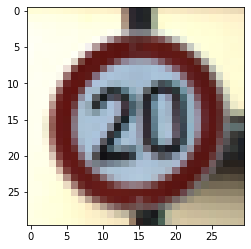

In [5]:
path = "img_class/Train/0/00000_00004_00029.png"
img = Image.open(path)
img = img.resize((30, 30))
sr = np.array(img) 
plt.imshow(img)
plt.show()

The dataset is now loaded and converted into numpy array

## Train-Test Split on the data

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("training shape: ",x_train.shape, y_train.shape)
print("testing shape: ",x_test.shape, y_test.shape)
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

training shape:  (31367, 30, 30, 3) (31367,)
testing shape:  (7842, 30, 30, 3) (7842,)


## Creating a model using Convolutional Nueral Network

In [8]:
model = tf.keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation="softmax"))

Metal device set to: Apple M1


2023-04-08 15:05:19.505764: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-08 15:05:19.508466: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-08 15:05:19.509911: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


- We use 2 nets with 32 filters and 2 nets with 64 filters
- We use relu activation functions for the all the nets and use a softmax activation for the last net


## Compiling the model and fitting on the data

In [9]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
epochs = 15
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/15


2023-04-08 15:05:20.160354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


491/491 [==============================] - ETA: 0s - loss: 2.5138 - accuracy: 0.3914

2023-04-08 15:05:33.152327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


491/491 [==============================] - 15s 28ms/step - loss: 2.5138 - accuracy: 0.3914 - val_loss: 0.9190 - val_accuracy: 0.7665
Epoch 2/15
491/491 [==============================] - 13s 27ms/step - loss: 1.0772 - accuracy: 0.6831 - val_loss: 0.4887 - val_accuracy: 0.8753
Epoch 3/15
491/491 [==============================] - 14s 28ms/step - loss: 0.7384 - accuracy: 0.7841 - val_loss: 0.2975 - val_accuracy: 0.9230
Epoch 4/15
491/491 [==============================] - 14s 28ms/step - loss: 0.5381 - accuracy: 0.8426 - val_loss: 0.2338 - val_accuracy: 0.9337
Epoch 5/15
491/491 [==============================] - 13s 27ms/step - loss: 0.4238 - accuracy: 0.8749 - val_loss: 0.1520 - val_accuracy: 0.9552
Epoch 6/15
491/491 [==============================] - 13s 27ms/step - loss: 0.3689 - accuracy: 0.8887 - val_loss: 0.1162 - val_accuracy: 0.9671
Epoch 7/15
491/491 [==============================] - 14s 28ms/step - loss: 0.3125 - accuracy: 0.9073 - val_loss: 0.0873 - val_accuracy: 0.9745
Epo

## Plotting the Accuracy & loss curve with each iteration

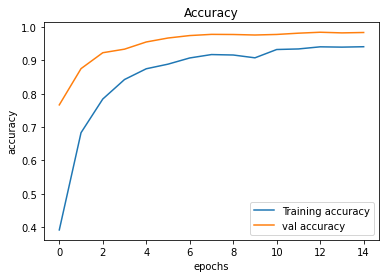

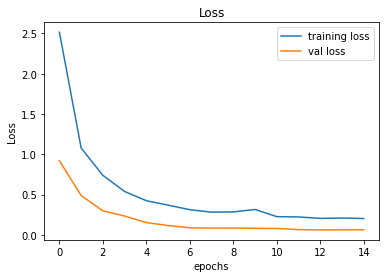

In [11]:
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure(1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Computing the accuracy score

In [27]:
from sklearn.metrics import accuracy_score
test = pd.read_csv("img_class/Test.csv")
test_labels = test.ClassId.values
test_img_path = "img_class"
test_imgs = test['Path'].values
test_data = []
#test_labels = []
for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((30,30))
    im = np.array(im)
    test_data.append(im)
test_data = np.array(test_data)
print(test_labels)
predict_x=model.predict(test_data) 
classes_x=np.argmax(predict_x,axis=1)
#predictions = model.predict_classes(test_data)
print("accuracy: ", accuracy_score(test_labels, classes_x))

[16  1 38 ...  6  7 10]
accuracy:  0.9536025336500396


## Saving the model

In [13]:
model.save('traffic_classifier.h5')

## Loading the model and defining classes

In [3]:
from keras.models import load_model
model = load_model('traffic_classifier.h5')
#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)',
            3:'Speed limit (50km/h)',
            4:'Speed limit (60km/h)',
            5:'Speed limit (70km/h)',
            6:'Speed limit (80km/h)',
            7:'End of speed limit (80km/h)',
            8:'Speed limit (100km/h)',
            9:'Speed limit (120km/h)',
            10:'No passing',
            11:'No passing veh over 3.5 tons',
            12:'Right-of-way at intersection',
            13:'Priority road',
            14:'Yield',
            15:'Stop',
            16:'No vehicles',
            17:'Veh > 3.5 tons prohibited',
            18:'No entry',
            19:'General caution',
            20:'Dangerous curve left',
            21:'Dangerous curve right',
            22:'Double curve',
            23:'Bumpy road',
            24:'Slippery road',
            25:'Road narrows on the right',
            26:'Road work',
            27:'Traffic signals',
            28:'Pedestrians',
            29:'Children crossing',
            30:'Bicycles crossing',
            31:'Beware of ice/snow',
            32:'Wild animals crossing',
            33:'End speed + passing limits',
            34:'Turn right ahead',
            35:'Turn left ahead',
            36:'Ahead only',
            37:'Go straight or right',
            38:'Go straight or left',
            39:'Keep right',
            40:'Keep left',
            41:'Roundabout mandatory',
            42:'End of no passing',
            43:'End no passing veh > 3.5 tons' }



Metal device set to: Apple M1


2023-04-13 13:58:52.880506: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-13 13:58:52.882941: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-13 13:58:52.884644: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Classifying the image

In [6]:
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    predict_x=model.predict(image) 
    classes_x=np.argmax(predict_x,axis=1)
    classes_x = classes_x[0]
    sign = classes[classes_x+1]
    print(sign)

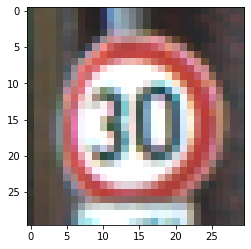

In [8]:
path = "img_class/Test/00001.png"
img = Image.open(path)
img = img.resize((30, 30))
sr = np.array(img) 
plt.imshow(img)
plt.show()

In [9]:
classify('img_class/Test/00001.png')

Speed limit (30km/h)
